## Zadanie 5

In [1]:
from scipy.spatial.distance import hamming

v1 = [1, 2, 0, 1]
v2 = [0, 0, 0, 1]
print(hamming(v1, v2))

0.5


In [2]:
v = [
    [1, 2, 1, 2, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 2, 1, 1],
    [2, 2, 2, 1, 0]
]

search_ = [None, None, float("inf")]
for v1 in v:
    for v2 in v:
        if v1 != v2 and hamming(v1, v2) < search_[-1]:
            search_ = [v1, v2, hamming(v1, v2)]

print(search_[:2])

[[1, 2, 1, 2, 0], [1, 1, 1, 1, 1]]


## Zadanie 6

In [3]:
import numpy as np

np.random.seed(123)

def generateAllVectors(B, k):
    ready = False
    multiplyers = np.zeros(len(B), dtype=np.uint8)
    words = set()

    while not ready:
        words.add(tuple(multiplyers.dot(B) % k))

        i = len(B) - 1
        multiplyers[i] += 1
        while not ready and multiplyers[i] == k:
            multiplyers[i] = 0
            multiplyers[i - 1] += 1
            i -= 1

            if i == -1:
                ready = True
    return sorted(words)

In [4]:
B = np.array([
    [1, 0, 0, 2, 4],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 5, 6]
], dtype=np.uint8)

words = generateAllVectors(B, 7)

In [5]:
# dla przejzystosci po 3 w jednej kolumnie

line = []
for word in words:
    if len(line) == 3:
        print("\t".join(line))
        line = []
    line.append(str(word))
print("\t".join(line))        

(0, 0, 0, 0, 0)	(0, 0, 1, 5, 6)	(0, 0, 2, 3, 5)
(0, 0, 3, 1, 4)	(0, 0, 4, 6, 3)	(0, 0, 5, 4, 2)
(0, 0, 6, 2, 1)	(0, 1, 0, 1, 0)	(0, 1, 1, 6, 6)
(0, 1, 2, 4, 5)	(0, 1, 3, 2, 4)	(0, 1, 4, 0, 3)
(0, 1, 5, 5, 2)	(0, 1, 6, 3, 1)	(0, 2, 0, 2, 0)
(0, 2, 1, 0, 6)	(0, 2, 2, 5, 5)	(0, 2, 3, 3, 4)
(0, 2, 4, 1, 3)	(0, 2, 5, 6, 2)	(0, 2, 6, 4, 1)
(0, 3, 0, 3, 0)	(0, 3, 1, 1, 6)	(0, 3, 2, 6, 5)
(0, 3, 3, 4, 4)	(0, 3, 4, 2, 3)	(0, 3, 5, 0, 2)
(0, 3, 6, 5, 1)	(0, 4, 0, 4, 0)	(0, 4, 1, 2, 6)
(0, 4, 2, 0, 5)	(0, 4, 3, 5, 4)	(0, 4, 4, 3, 3)
(0, 4, 5, 1, 2)	(0, 4, 6, 6, 1)	(0, 5, 0, 5, 0)
(0, 5, 1, 3, 6)	(0, 5, 2, 1, 5)	(0, 5, 3, 6, 4)
(0, 5, 4, 4, 3)	(0, 5, 5, 2, 2)	(0, 5, 6, 0, 1)
(0, 6, 0, 6, 0)	(0, 6, 1, 4, 6)	(0, 6, 2, 2, 5)
(0, 6, 3, 0, 4)	(0, 6, 4, 5, 3)	(0, 6, 5, 3, 2)
(0, 6, 6, 1, 1)	(1, 0, 0, 2, 4)	(1, 0, 1, 0, 3)
(1, 0, 2, 5, 2)	(1, 0, 3, 3, 1)	(1, 0, 4, 1, 0)
(1, 0, 5, 6, 6)	(1, 0, 6, 4, 5)	(1, 1, 0, 3, 4)
(1, 1, 1, 1, 3)	(1, 1, 2, 6, 2)	(1, 1, 3, 4, 1)
(1, 1, 4, 2, 0)	(1, 1, 5, 0, 6)	(1, 1, 6

## Zadanie 7

In [6]:
C = np.array(words, dtype=np.uint8)

In [7]:
def minimizeHammingDistance(C, B, v):
    dst = np.array([hamming(w, v) for w in C], dtype=np.float64)
    m = np.min(dst)
    L = C[np.where(dst == m)]
    w = L[np.random.randint(0, len(L))]
    
    # korzystajac ze znamy z gory B dla zadania 7
    return [w[0], w[1], w[2]]

In [8]:
minimizeHammingDistance(C, B, [1, 2, 3, 4, 5])

[1, 2, 0]

## Zadanie 8

a)

In [9]:
M = np.random.randint(5, size=(4, 10))

b)

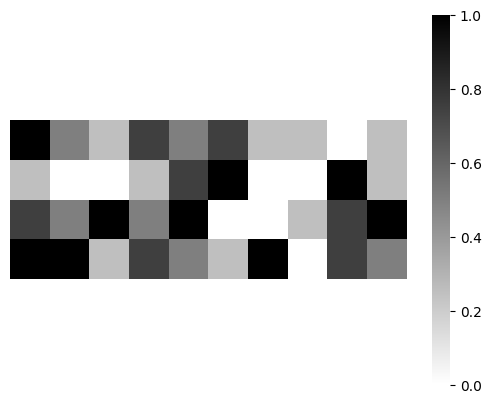

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

M_norm = M / 4.
sns.heatmap(M_norm, cmap="binary", square=True)
plt.axis("off")
plt.show()

c)

Tu nic nie trzeba robić, na podstawie pierwszysch 4 pozycji w kazdym wektorze od razu widać, ze są one liniowo niezalezne, a zatem G.T (wektory z G) jest bazą 4 wymiarowej podprzestrzeni przestrzeni 11 wymiarowej nad ciałem Z_5. A zatem jest macierzą generującą kodu (11, 4) liniowego nad tym ciałem. 

In [11]:
G = np.array([
    [1, 0, 0, 0, 0, 4, 4, 2, 0, 1, 1],
    [0, 1, 0, 0, 0, 3, 0, 2, 2, 1, 0],
    [0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 0, 0, 0, 4, 3, 0]
], dtype=np.uint8)

d)

In [12]:
# to % 5 nie ma pozniej znaczenia, ale dzialamy w z5 wiec niech bedzie

M_coded = np.array([
    (w.T.dot(G)).T % 5 for w in M.T
])

In [13]:
print(M.T[0], " - zakodowany to: ", M_coded[0])

[4 1 3 4]  - zakodowany to:  [4 1 3 4 4 0 1 3 1 0 2]


e)

In [14]:
probabilities_mask = np.random.random(size=M_coded.shape)
channel_mask = np.vectorize(lambda x: 0 if x < 0.95 else 3)(probabilities_mask)
M_send = M_coded + channel_mask

f)

In [15]:
def minimizeHammingDistance(C, B, v):
    dst = np.array([hamming(w, v) for w in C], dtype=np.float64)
    m = np.min(dst)
    L = C[np.where(dst == m)]
    w = L[np.random.randint(0, len(L))]

    # korzystajac ze znamy z gory B dla zadania 8
    return [w[0], w[1], w[2], w[3]]

In [16]:
C = np.array(generateAllVectors(G, 5), dtype=np.uint8)

M_encoded = np.array([minimizeHammingDistance(C, G, v) for v in M_send]).T

h)

In [17]:
np.sum(np.all(M_encoded == M, axis=0))

10

In [18]:
# zatem wszystkie - na potwierdzenie:
np.all(M_encoded == M)

True

i)

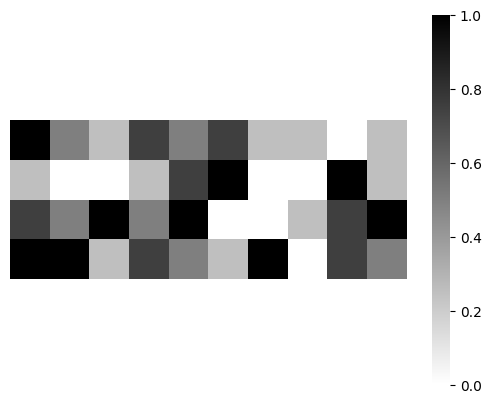

In [19]:
M_encoded_norm = M_encoded / 4.

sns.heatmap(M_encoded_norm, cmap="binary", square=True)
plt.axis("off")
plt.show()